# **INTRODUCTION**

Body Odor (BO) is a common but socially sensitive issue influenced by biological, lifestyle, and environmental factors.

This research explores the prevalence, causes, effects, and possible remedies for body odor among residents of Lagos State. 
The dataset includes demographic information, hygiene practices, dietary habits, sweating patterns, family history, emotional impact, and self-reported body odor experience.

The goal of this notebook is to:
- Perform data ingestion and validation
- Clean and transform the dataset
- Explore the data using interactive visualizations
- Conduct statistical tests to examine associations
- Summarize insights and provide recommendations

This analysis is designed for a real-world, portfolio-ready data science project.

Variable:
1. Age
2. Gender
3. LGA/LCDA
4. How often do you bathe or shower per day?
5. Do you use any of the following regularly?
6. How often do you consume the following foods?
7. Do you sweat excessively even when not active?',
8. Are you aware of any medical condition that may cause body odor (e.g., diabetes, thyroid disorder)?
9. Do you have close relatives with persistent body odor?
10. Have you ever been told you have body odor?
11. If yes, how did it affect you emotionally?
12. Has body odor ever affected your social life or self-confidence?
13. Do you think body odor can cause social discrimination or stigmatization?
14. Have you tried any of the following to reduce body odor?
15. Rate the effectiveness of your chosen remedies.
16. Do you believe some people naturally have stronger body odor due to their body chemistry or genetics?
17. Do you think body odor should be treated as a medical issue in some cases?

In [1]:
import pandas as pd

df_orig = pd.read_csv("Odor_Data.txt", sep="\t")
df_orig.head()

,1. Age,2. Gender,3. LGA/LCDA,4. How often do you bathe or shower per day?,5. Do you use any of the following regularly? (Tick all that apply),6. How often do you consume the following foods? (Tick those eaten regularly),7. Do you sweat excessively even when not active?,"8. Are you aware of any medical condition that may cause body odor (e.g., diabetes, thyroid disorder)?",9. Do you have close relatives with persistent body odor?,10. Have you ever been told you have body odor?,"11. If yes, how did it affect you emotionally?",12. Has body odor ever affected your social life or self-confidence?,13. Do you think body odor can cause social discrimination or stigmatization?,14. Have you tried any of the following to reduce body odor? (Tick all that apply),15. Rate the effectiveness of your chosen remedies.,16. Do you believe some people naturally have stronger body odor due to their body chemistry or genetics?,17. Do you think body odor should be treated as a medical issue in some cases
0,25-34 years,Male,Alimosho,Twice,"Antibacterial soap, Deodorant/Antiperspirant","Spicy foods, Red meat",No,Not sure,No,No,Not affected,No,Agree,"Frequent Bathing, Use of perfumes or deodorants",Very effective,Yes,Yes
1,25-34 years,Male,Surulere,Twice,Deodorant/Antiperspirant,Spicy foods,No,No,No,No,Somewhat uncomfortable,No,Agree,Use of perfumes or deodorants,Very effective,Yes,Yes
2,18-24 years,Male,Ifako Ijaiye,Twice,"Antibacterial soap, Deodorant/Antiperspirant","Spicy foods, Onions/Garlic, Processed foods",No,No,No,No,Not affected,No,Agree,Use of perfumes or deodorants,Very effective,Not sure,Yes
3,25-34 years,Female,Shomolu,Twice,Deodorant/Antiperspirant,"Onions/Garlic, Red meat, Processed foods",No,No,No,No,Not affected,No,Agree,Use of perfumes or deodorants,Very effective,Yes,Yes
4,18-24 years,Female,Eti-Osa,Twice,Deodorant/Antiperspirant,"Spicy foods, Onions/Garlic",No,No,Yes,No,Not affected,No,Strongly agree,"Frequent Bathing, Use of perfumes or deodorants",Very effective,Yes,Yes


**Data Ingestion and Cleaning**

In this section, I import the dataset and apply a structured cleaning process.
The cleaning includes:

- Standardizing column names  
- Removing leading/trailing spaces  
- Validating LGA/LCDA values  
- Parsing multi-select fields (foods, hygiene, remedies)  
- Encoding categorical fields  
- Creating binary indicators (e.g., BO present: 1/0)

I also applied a validation step to check for unexpected or invalid entries, ensuring the dataset is ready for analysis.


**Data Ingestion Module**  
This function lets you load any future dataset easily.

In [2]:
import pandas as pd

def load_data(file_path: str) -> pd.DataFrame:
    """
    Loads dataset from CSV, TXT, or TSV file formats.
    
    Args:
        file_path (str): Path to the dataset.

    Returns:
        pd.DataFrame: Loaded dataframe.
    """
    try:
        if file_path.endswith(".csv"):
            return pd.read_csv(file_path)

        elif file_path.endswith(".txt") or file_path.endswith(".tsv"):
            return pd.read_csv(file_path, sep="\t")

        else:
            raise ValueError("Unsupported file format")

    except Exception as e:
        print("ERROR loading data →", e)
        raise e


**Data Validation Module**  
This function ensures that every new dataset follows the same structure.

In [3]:
import pandas as pd

REQUIRED_COLUMNS = [
    "1. Age", "2. Gender", "3. LGA/LCDA",
    "4. How often do you bathe or shower per day?",
    "5. Do you use any of the following regularly? (Tick all that apply)",
    "6. How often do you consume the following foods? (Tick those eaten regularly)",
    "7. Do you sweat excessively even when not active?",
    "8. Are you aware of any medical condition that may cause body odor (e.g., diabetes, thyroid disorder)?",
    "9. Do you have close relatives with persistent body odor?",
    "10. Have you ever been told you have body odor?",
    "11. If yes, how did it affect you emotionally?",
    "12. Has body odor ever affected your social life or self-confidence?",
    "13. Do you think body odor can cause social discrimination or stigmatization?",
    "14. Have you tried any of the following to reduce body odor? (Tick all that apply)",
    "15. Rate the effectiveness of your chosen remedies.",
    "16. Do you believe some people naturally have stronger body odor due to their body chemistry or genetics?",
    "17. Do you think body odor should be treated as a medical issue in some cases"
]

def validate_columns(df: pd.DataFrame) -> bool:
    """
    Validates that all required columns exist.

    Returns:
        True if valid, False if missing columns.
    """
    missing = [col for col in REQUIRED_COLUMNS if col not in df.columns]

    if missing:
        print("❌ Missing columns:", missing)
        return False

    print("✔ All required columns present.")
    return True


**Data Cleaning Module**

In [4]:
import pandas as pd

valid_lgas = [
    "Agbado/Oke-Odo", "Epe", "Ikeja", "Odi Olowo/Ojuwoye", "Agboyi/Ketu", "Eredo", 
    "Ikorodu North", "Ojo", "Agege", "Eti Osa East", "Ikorodu West", "Ojodu", "Ajeromi",
    "Eti Osa West", "Ikosi", "Ejinrin", "Ojokoro", "Alimosho", "Iba", "Ikorodu", 
    "Olorunda", "Apapa", "Isolo", "Iru/Victoria Island", "Onigbongbo", "Apapa-Iganmu", 
    "Imota", "Itire Ikate", "Oriade", "Ayobo/Ipaja", "Ikoyi-Obalende", "Kosofe",
    "Orile Agege", "Badagry West", "Ibeju", "Lagos West", "Oshodi", "Badagry",
    "Ifako Ijaiye", "Lagos East", "Oto-Awori", "Bariga", "Ifelodun", "Lagos Mainland",
    "Shomolu", "Coker", "Aguda", "Igando/Ikotun", "Lekki", "Surulere", "Egbe Idimu",
    "Igbogbo/Bayeku", "Mosan/Okunola", "Yaba", "Ejigbo", "Ijede", "Mushin", 
    "Ajeromi-Ifelodun", "Amuwo-Odofin", "Lagos Island", "Oshodi-Isolo"
]

age_group_order =[
    "18-24 years",
    "25-34 years",
    "35-44 years",
    "45-54 years",
    "55-64 years",
    "65 & above"
]

def clean_age_group(series):
    """
    Cleans and locks Age into ordered categorical groups.
    Any unexpected value is set to 'Unknown'.
    """
    series = series.astype(str).str.strip()

    series = series.where(series.isin(age_group_order), "Unknown")

    return pd.Categorical(
        series,
        categories=age_group_order,
        ordered=True
    )

def clean_multi_select(series: pd.Series):
    """
    Splits comma-separated multi-select answers into lists.
    """
    return series.apply(lambda x: [i.strip() for i in x.split(",")] if isinstance(x, str) else [])

def clean_binary(series: pd.Series):
    """
    Converts Yes/No/Not sure to numeric values.
    """
    mapping = {"Yes": 1, "No": 0, "Not sure": None}
    return series.map(mapping)

def standardize_lga(value: str):
    """
    Cleans and standardizes LGA names by:
    - Removing leading/trailing spaces
    - Normalizing spacing
    - Converting known variants to official versions
    """

    if not isinstance(value, str):
        return "others"

    # Step 1: strip spaces + remove double spaces
    value = value.strip().replace("  ", " ")

    # Step 2: unify separators (for things like 'Oshodi Isolo")
    value = value.replace(" - ", "-").replace("- ", "-")
    value = value.replace("/", "/") # ensure consistent slash
    value = value.replace(" ", " ") # single space normalization

    # Step 3: map known variants → official values
    replacement_map = {
        "Oshodi Isolo": "Oshodi-Isolo",
        "Oshodi Isolo ": "Oshodi-Isolo",
        "Alimosho ": "Alimosho",
        "Surulere ": "Surulere",
        "Shomolu ": "Shomolu",
        "Kosofe ": "Kosofe",
        "Badagry ": "Badagry",
        "Ibeju Lekki": "Ibeju",
        "Ikosi Isheri": "Ikosi",
        "Ikorodu ": "Ikorodu",
        "Ajeromi ": "Ajeromi",
        "Lagos Island ": "Lagos Island",
        "Ketu": "Agboyi/Ketu",   # interpret Ketu correctly
        "Eti-Osa": "Eti Osa East",  # safe default
        "Ajah": "Eti Osa East",
        "Akoka": "Yaba",
        "Ebute Metta": "Yaba",
    }

    if value in replacement_map:
        return replacement_map[value]

    return value
    
""" def validate_lga(df, valid_lgas):
    
    Clean, standardize, and validate the LGA column. If any values are not in the valid list,
    raise an error and list the invalid entries.
    
    df["LGA/LCDA"] = df["3. LGA/LCDA"].apply(standardize_lga)

    df["LGA/LCDA"] = df["LGA/LCDA"].apply(lambda x: x if x in valid_lgas else "Others")

    invalid_count = (df["LGA/LCDA"] == "Others").sum()

    summary = {
        "total_rows": len(df),
        "invalid_lga_rows": invalid_count,
        "valid_rows": len(df) - invalid_count,
        "percent_invalid": round((invalid_count / len(df)) * 100, 2)
    }
    
    return df, summary
    """
def validate_lga(df, valid_lgas):
    """
    Standardizes and validates the LGA column. Invalid LGA entries are dropped from the dataframe.
    Returns a summary dictionary with total rows,  valid rows, and the percentage of invalid rows.
    """
    df["LGA/LCDA"] = df["3. LGA/LCDA"].apply(standardize_lga)
    df["LGA/LCDA"] = df["LGA/LCDA"].apply(lambda x: x if x in valid_lgas else "Others")
    invalid_count = (df["LGA/LCDA"] == "Others").sum()
    df = df[df["LGA/LCDA"] != "Others"]
    summary = {
        "total_rows": len(df),
        "valid_rows": len(df),
        "percent_invalid": round((invalid_count / len(df)) * 100, 2) if len(df) > 0 else 0
    }
    return df, summary
    
def clean_dataset(df: pd.DataFrame) -> pd.DataFrame:

    df = df.copy()
    """
    Full data cleaning pipeline, including LGA cleaning + validation.
    """
    #Age cleaning
    df["Age_Group"] = clean_age_group(df["1. Age"])
    
    # Clean + validate LGA
    df, lga_summary = validate_lga(df, valid_lgas)

    print("\n LGA Cleaning Summary:")
    print(lga_summary)

    
    # Split multi-select fields
    df.loc[:, "Foods"] = clean_multi_select(df["6. How often do you consume the following foods? (Tick those eaten regularly)"])
    df.loc[:, "Hygiene"] = clean_multi_select(df["5. Do you use any of the following regularly? (Tick all that apply)"])
    df.loc[:, "Remedies"] = clean_multi_select(df["14. Have you tried any of the following to reduce body odor? (Tick all that apply)"])

    # Convert Yes/No columns to numeric
    df.loc[:, "Excessive Sweating"] = clean_binary(df["7. Do you sweat excessively even when not active?"])
    df.loc[:, "Told_BO"] = clean_binary(df["10. Have you ever been told you have body odor?"])

    return df

# **Test Code**

In [6]:
from data_ingestion import load_data
from data_validation import validate_columns
from data_cleaning import clean_dataset, validate_lga
import pandas as pd

def test_body_odor_pipeline(file_path):
    """
    Tests the full data ingestion + validation + cleaning pipeline.
    Prints success or failure messages.
    """

    print("🔍 Testing Body Odor Data Pipeline...\n")

    try:
        # Step 1: Load data
        df = load_data(file_path)
        print("✔ Data loaded successfully!")
        print(f"   Shape: {df.shape}\n")

    except Exception as e:
        print("❌ FAILED: Could not load data.")
        print("   Error:", e)
        return None

    # Step 2: Validate columns
    is_valid = validate_columns(df)

    if not is_valid:
        print("\n❌ FAILED: Dataset is missing required columns.")
        return None
    else:
        print("✔ Column validation passed!\n")

    try:
        # Step 3: Clean dataset
        df_clean = clean_dataset(df)
        print("✔ Cleaning completed successfully!")
        print(f"   Cleaned Data Shape: {df_clean.shape}")

    except Exception as e:
        print("\n❌ FAILED: Cleaning function crashed.")
        print("   Error:", e)
        return None

    print("\nALL TESTS PASSED — Pipeline is working perfectly!\n")
    return df_clean


# --- RUN THE TEST ---
file_path = r"C:\Users\USER\BodyOdor_Project\Odor_Data.txt"

df_clean = test_body_odor_pipeline(file_path)


🔍 Testing Body Odor Data Pipeline...

✔ Data loaded successfully!
   Shape: (82, 17)

✔ All required columns present.
✔ Column validation passed!


 LGA Cleaning Summary:
{'total_rows': 76, 'valid_rows': 76, 'percent_invalid': np.float64(7.89)}
✔ Cleaning completed successfully!
   Cleaned Data Shape: (76, 24)

ALL TESTS PASSED — Pipeline is working perfectly!



In [7]:
df_clean.head(5)

,1. Age,2. Gender,3. LGA/LCDA,4. How often do you bathe or shower per day?,5. Do you use any of the following regularly? (Tick all that apply),6. How often do you consume the following foods? (Tick those eaten regularly),7. Do you sweat excessively even when not active?,"8. Are you aware of any medical condition that may cause body odor (e.g., diabetes, thyroid disorder)?",9. Do you have close relatives with persistent body odor?,10. Have you ever been told you have body odor?,...,15. Rate the effectiveness of your chosen remedies.,16. Do you believe some people naturally have stronger body odor due to their body chemistry or genetics?,17. Do you think body odor should be treated as a medical issue in some cases,Age_Group,LGA/LCDA,Foods,Hygiene,Remedies,Excessive Sweating,Told_BO
0,25-34 years,Male,Alimosho,Twice,"Antibacterial soap, Deodorant/Antiperspirant","Spicy foods, Red meat",No,Not sure,No,No,...,Very effective,Yes,Yes,25-34 years,Alimosho,"[Spicy foods, Red meat]","[Antibacterial soap, Deodorant/Antiperspirant]","[Frequent Bathing, Use of perfumes or deodorants]",0.0,0.0
1,25-34 years,Male,Surulere,Twice,Deodorant/Antiperspirant,Spicy foods,No,No,No,No,...,Very effective,Yes,Yes,25-34 years,Surulere,[Spicy foods],[Deodorant/Antiperspirant],[Use of perfumes or deodorants],0.0,0.0
2,18-24 years,Male,Ifako Ijaiye,Twice,"Antibacterial soap, Deodorant/Antiperspirant","Spicy foods, Onions/Garlic, Processed foods",No,No,No,No,...,Very effective,Not sure,Yes,18-24 years,Ifako Ijaiye,"[Spicy foods, Onions/Garlic, Processed foods]","[Antibacterial soap, Deodorant/Antiperspirant]",[Use of perfumes or deodorants],0.0,0.0
3,25-34 years,Female,Shomolu,Twice,Deodorant/Antiperspirant,"Onions/Garlic, Red meat, Processed foods",No,No,No,No,...,Very effective,Yes,Yes,25-34 years,Shomolu,"[Onions/Garlic, Red meat, Processed foods]",[Deodorant/Antiperspirant],[Use of perfumes or deodorants],0.0,0.0
4,18-24 years,Female,Eti-Osa,Twice,Deodorant/Antiperspirant,"Spicy foods, Onions/Garlic",No,No,Yes,No,...,Very effective,Yes,Yes,18-24 years,Eti Osa East,"[Spicy foods, Onions/Garlic]",[Deodorant/Antiperspirant],"[Frequent Bathing, Use of perfumes or deodorants]",0.0,0.0


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
widgets.IntSlider()

IntSlider(value=0)

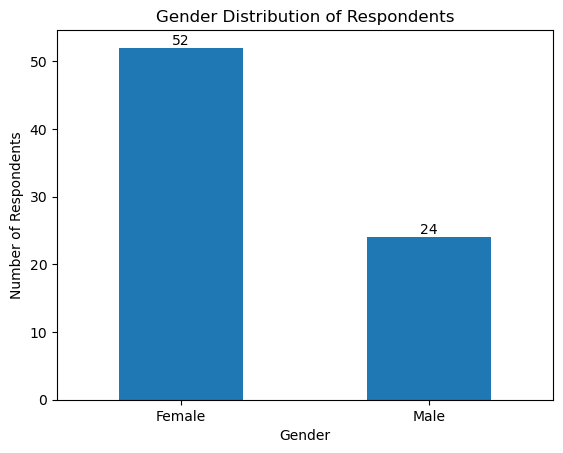

In [9]:
gender_counts = df_clean["2. Gender"].value_counts()

plt.figure()
gender_counts.plot(kind="bar")

plt.title("Gender Distribution of Respondents")
plt.xlabel("Gender")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=0)
for index, value in enumerate(gender_counts.values):
    plt.text(index, value, value, ha="center", va="bottom")

plt.show()

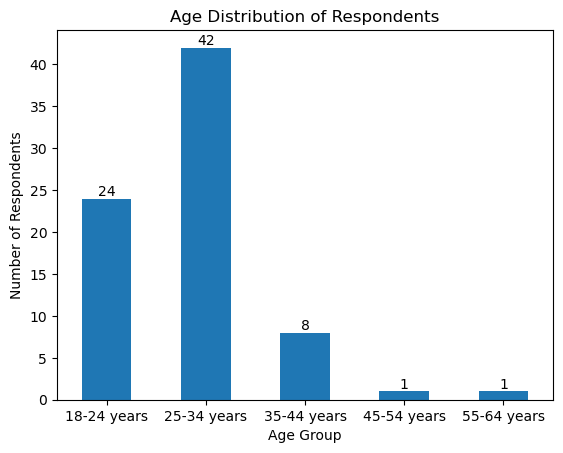

In [10]:
Age_counts = (df_clean["1. Age"].value_counts().sort_index())

plt.figure()
Age_counts.plot(kind="bar")
plt.title("Age Distribution of Respondents")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=0)

for i, v in enumerate(Age_counts.values):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.show()

In [11]:
fig = px.histogram(
    df_clean,
    x= "LGA/LCDA",
    text_auto=True,
    title="Distribution of Respondents by LGA/LCDA"
)
fig.update_xaxes(tickangle=50)
fig.show()

# **INTERACTIVE ANALYSIS**

Interactive Filter: Body Odor Experience by Gender

In [12]:
gender_filter = widgets.Dropdown(
    options=["All"] + df_clean["2. Gender"].unique().tolist(),
    description="Gender:"
)

def plot_bo_by_gender(g):
    if g == "All":
        d = df_clean
    else:
        d = df_clean[df_clean["2. Gender"] == g]

    fig = px.histogram(
        d,
        x="10. Have you ever been told you have body odor?",
        text_auto=True,
        title=f"Body Odor Experience ({g})"
    )
    fig.show()

widgets.interact(plot_bo_by_gender, g=gender_filter)

interactive(children=(Dropdown(description='Gender:', options=('All', 'Male', 'Female'), value='All'), Output(…

<function __main__.plot_bo_by_gender(g)>

**HYGIENE × BODY ODOR**

Bathing Frequency vs Body Odor

In [13]:
fig = px.histogram(
    df_clean,
    x="4. How often do you bathe or shower per day?",
    color="10. Have you ever been told you have body odor?",
    barmode="group",
    text_auto=True,
    title="Bathing Frequency vs Body Odor Report"
)
fig.show()

# **MULTI-SELECT COLUMNS ANALYSIS**

Here we analyze the Foods and Hygiene list-type columns.

In [14]:
from collections import Counter
food_counts = Counter()

for items in df_clean["Foods"]:
    for f in items:
        food_counts[f] += 1

foods_df = pd.DataFrame.from_dict(food_counts, orient="index", columns=["Count"]).sort_values("Count", ascending=False)

fig = px.bar(
    foods_df,
    x=foods_df.index,
    y="Count",
    text_auto=True,
    title="Most Common Foods Selected",
)
fig.update_xaxes(title="Food Type", tickangle=0)
fig.update_yaxes(title="Number of Selections")
fig.show()

Count most common Hygiene choices

In [16]:
hygiene_counts = Counter()

for items in df_clean["Hygiene"]:
    for h in items:
        hygiene_counts[h] += 1

hygiene_df = pd.DataFrame.from_dict(hygiene_counts, orient="index", columns=["Count"]).sort_values("Count", ascending=False)

fig = px.bar(
    hygiene_df,
    x=hygiene_df.index,
    y="Count",
    text_auto=True,
    title="Most Common Hygiene Methods",
)
fig.update_xaxes(title="Hygiene Method", tickangle=0)
fig.update_yaxes(title="Number of Selections")
fig.show()

# Does Food Affect Body Odor?

This lets users pick a food item and see if those who selected it report more BO.

In [17]:
food_options = sorted(list(food_counts.keys()))

food_selector = widgets.Dropdown(
    options=food_options,
    description="Food:"
)

def plot_food_vs_bo(food):
    df_food = df_clean[df_clean["Foods"].apply(lambda x: food in x)]

    fig = px.histogram(
        df_food,
        x="10. Have you ever been told you have body odor?",
        text_auto=True,
        title=f"Body Odor Experience Among People Who Consume '{food}'"
    )
    fig.show()

widgets.interact(plot_food_vs_bo, food=food_selector)


interactive(children=(Dropdown(description='Food:', options=('Diary (milk', 'Onions/Garlic', 'Processed foods'…

<function __main__.plot_food_vs_bo(food)>

**Remedies vs BO**

In [18]:
remedy_counts = Counter()
for items in df_clean["Remedies"]:
    for r in items:
        remedy_counts[r] += 1

remedy_selector = widgets.Dropdown(
    options=list(remedy_counts.keys()),
    description="Remedy:"
)

def plot_remedy_vs_bo(remedy):
    df_r = df_clean[df_clean["Remedies"].apply(lambda x: remedy in x)]

    fig = px.histogram(
        df_r,
        x="10. Have you ever been told you have body odor?",
        text_auto=True,
        title=f"Body Odor Levels Among People Using Remedy: {remedy}"
    )
    fig.show()

widgets.interact(plot_remedy_vs_bo, remedy=remedy_selector)


interactive(children=(Dropdown(description='Remedy:', options=('Frequent Bathing', 'Use of perfumes or deodora…

<function __main__.plot_remedy_vs_bo(remedy)>

**BO vs Excessive Sweating**

In [19]:
fig = px.histogram(
    df_clean,
    x="Excessive Sweating",
    color="10. Have you ever been told you have body odor?",
    barmode="group",
    text_auto=True,
    title="Does Excessive Sweating Relate to Body Odor?"
)
fig.show()


**BO vs Emotional Effect**

In [20]:
fig = px.histogram(
    df_clean,
    x="11. If yes, how did it affect you emotionally?",
    color="10. Have you ever been told you have body odor?",
    text_auto=True,
    title="Effect of Body Odor on People's Emotions"
)
fig.update_xaxes(tickangle=0)
fig.show()

# **STATISTICAL ANALYSIS**

In [21]:
import pandas as pd
from scipy.stats import chi2_contingency, spearmanr

**CHI-SQUARE: Hygiene vs BODY ODOR**

In [23]:
def chi_square_hygiene(df):
    print("\nCHI-SQUARE TEST — Hygiene vs Body Odor")

    hygiene_items = set([item for sublist in df["Hygiene"] for item in sublist])

    results = []

    for item in hygiene_items:
        df_temp = df.copy()
        df_temp[item] = df_temp["Hygiene"].apply(lambda x: item in x)

        table = pd.crosstab(df_temp[item], df_temp["Told_BO"])
        chi2, p, dof, exp = chi2_contingency(table)

        results.append({"Hygiene Item": item, "Chi2": chi2, "p-value": p})

    return pd.DataFrame(results).sort_values("p-value")


chi_square_hygiene(df_clean)



CHI-SQUARE TEST — Hygiene vs Body Odor


,Hygiene Item,Chi2,p-value
0,Deodorant/Antiperspirant,0.005908,0.938732
1,Herbel remedies,0.000000,1.000000
2,Antibacterial soap,0.000000,1.000000
3,Herbal remedies,0.000000,1.000000
4,Talcum powder,0.000000,1.000000


**CHI-SQUARE: DIET vs BODY ODOR**

In [25]:
def chi_square_diet(df):
    print("\nCHI-SQUARE TEST - Diet vs Body Odor Experience")

    food_items = set([item for sublist in df["Foods"] for item in sublist])

    results = []

    for item in food_items:
        df_temp = df.copy()
        df_temp[item] = df_temp["Foods"].apply(lambda x: item in x)

        table = pd.crosstab(df_temp[item], df_temp["Told_BO"])
        chi2, p, dof, exp = chi2_contingency(table)

        results.append({"Food Item": item, "Chi2": chi2, "p-value": p})

    return pd.DataFrame(results).sort_values("p-value")


chi_square_diet(df_clean)


CHI-SQUARE TEST - Diet vs Body Odor Experience


,Food Item,Chi2,p-value
1,Processed foods,0.855304,0.355056
0,Spicy foods,0.231220,0.630621
3,yogurt,0.171445,0.678830
4,Diary (milk,0.171445,0.678830
5,cheese etc),0.171445,0.678830
2,Onions/Garlic,0.000000,1.000000
6,Red meat,0.000000,1.000000


**CHI-SQUARE: FAMILY HISTORY vs BODY ODOR**

If you have a Family_History column (Yes/No):

In [26]:
def chi_square_family(df):
    print("\nCHI-SQUARE TEST - Family History vs Body Odor")

    table = pd.crosstab(df["9. Do you have close relatives with persistent body odor?"], df["10. Have you ever been told you have body odor?"])
    chi2, p, dof, exp = chi2_contingency(table)

    print(table)
    print(f"\nChi-square = {chi2}, p-value = {p}")

chi_square_family(df_clean)


CHI-SQUARE TEST - Family History vs Body Odor
10. Have you ever been told you have body odor?     No  Yes
9. Do you have close relatives with persistent ...         
No                                                  53    8
Yes                                                 11    4

Chi-square = 0.7998861566484519, p-value = 0.37112740899073204


**SPEARMAN — Emotional Impact vs BO**

Assuming you have a coded numeric scale like:

1 = Not affected

2 = Slightly affected

3 = Embarrassed

4 = Very embarrassed

In [27]:
def spearman_emotion(df):
    print("\nSPEARMAN CORRELATION — Emotional Impact vs BO")

    corr, p = spearmanr(df["11. If yes, how did it affect you emotionally?"], df["10. Have you ever been told you have body odor?"])

    print(f"Correlation = {corr}")
    print(f"p-value = {p}")

spearman_emotion(df_clean)


SPEARMAN CORRELATION — Emotional Impact vs BO
Correlation = 0.4357285668092883
p-value = 8.349582616000946e-05


**Remedy Effectiveness vs BO**

Assuming remedy effectiveness has:

1 = Not effective

2 = Slightly effective

3 = Effective

4 = Very effective

In [28]:
def spearman_effective(df):
    print("\nSPEARMAN CORRELATION - Remedy Effectiveness vs BO")

    corr, p = spearmanr(df["15. Rate the effectiveness of your chosen remedies."], df["10. Have you ever been told you have body odor?"])

    print(f"Correlation = {corr}")
    print(f"p-value = {p}")

spearman_effective(df_clean)


SPEARMAN CORRELATION - Remedy Effectiveness vs BO
Correlation = -0.24681328803792815
p-value = 0.03160428755119222


# **COMBINED SUMMARY REPORT**

In [29]:
def statistical_summary(df):
    print("\nSUMMARY OF STATISTICAL TEST RESULTS\n")

    print("\nHygiene vs BO (Chi-square)")
    display(chi_square_hygiene(df))

    print("\nDiet vs BO (Chi-square)")
    display(chi_square_diet(df))

    print("\nFamily History vs Body Odor")
    chi_square_family(df_clean)

    print("\nEmotional Impact vs BO (Spearman)")
    spearman_emotion(df)

    print("\nRemedy Effectiveness vs BO (Spearman)")
    spearman_effective(df)

statistical_summary(df_clean)


SUMMARY OF STATISTICAL TEST RESULTS


Hygiene vs BO (Chi-square)

CHI-SQUARE TEST — Hygiene vs Body Odor


,Hygiene Item,Chi2,p-value
0,Deodorant/Antiperspirant,0.005908,0.938732
1,Herbel remedies,0.000000,1.000000
2,Antibacterial soap,0.000000,1.000000
3,Herbal remedies,0.000000,1.000000
4,Talcum powder,0.000000,1.000000



Diet vs BO (Chi-square)

CHI-SQUARE TEST - Diet vs Body Odor Experience


,Food Item,Chi2,p-value
1,Processed foods,0.855304,0.355056
0,Spicy foods,0.231220,0.630621
3,yogurt,0.171445,0.678830
4,Diary (milk,0.171445,0.678830
5,cheese etc),0.171445,0.678830
2,Onions/Garlic,0.000000,1.000000
6,Red meat,0.000000,1.000000



Family History vs Body Odor

CHI-SQUARE TEST - Family History vs Body Odor
10. Have you ever been told you have body odor?     No  Yes
9. Do you have close relatives with persistent ...         
No                                                  53    8
Yes                                                 11    4

Chi-square = 0.7998861566484519, p-value = 0.37112740899073204

Emotional Impact vs BO (Spearman)

SPEARMAN CORRELATION — Emotional Impact vs BO
Correlation = 0.4357285668092883
p-value = 8.349582616000946e-05

Remedy Effectiveness vs BO (Spearman)

SPEARMAN CORRELATION - Remedy Effectiveness vs BO
Correlation = -0.24681328803792815
p-value = 0.03160428755119222
